### Chicago Crime Analysis

In [1]:
import json
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data_filepaths = list(pathlib.Path('data').glob('2020*csv'))
data_filepaths

[WindowsPath('data/2020_data.csv')]

In [3]:
cfile = data_filepaths[0]
cdata = pd.read_csv(cfile)
cdata.head()


,ID,Case Number,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude
0,12014684,JD189901,03/17/2020 09:30:00 PM,0820,THEFT,STREET,False,False,1634,16.0,41.952052,-87.754660
1,12012127,JD189186,03/18/2020 02:03:00 AM,0910,MOTOR VEHICLE THEFT,APARTMENT,False,True,1132,11.0,41.877110,-87.723990
2,12012330,JD189367,03/18/2020 08:50:00 AM,0560,ASSAULT,RESIDENCE,False,False,2525,25.0,41.923369,-87.731634
3,12014760,JD192130,03/18/2020 01:00:00 PM,1150,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,False,1113,11.0,41.879264,-87.743971
4,12012667,JD189808,03/18/2020 05:35:00 PM,2017,NARCOTICS,SIDEWALK,True,False,1533,15.0,41.876128,-87.745112


In [4]:
cdata.shape

(211791, 12)

In [ ]:
%%time

cfile = data_filepaths[0]
cdata = pd.read_csv(cfile, parse_dates=['Date'])
cdata.head()

In [ ]:
%%time

cfile = data_filepaths[0]
cdata = pd.read_csv(cfile)
cdata['Date'] = pd.to_datetime(cdata['Date'])
cdata.head()

In [5]:
%%time

cfile = data_filepaths[0]
cdata = pd.read_csv(cfile)
cdata['Date'] = pd.to_datetime(cdata['Date'], format="%m/%d/%Y %I:%M:%S %p")
cdata.head()

CPU times: total: 2.83 s
Wall time: 2.87 s


,ID,Case Number,Date,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude
0,12014684,JD189901,2020-03-17 21:30:00,0820,THEFT,STREET,False,False,1634,16.0,41.952052,-87.754660
1,12012127,JD189186,2020-03-18 02:03:00,0910,MOTOR VEHICLE THEFT,APARTMENT,False,True,1132,11.0,41.877110,-87.723990
2,12012330,JD189367,2020-03-18 08:50:00,0560,ASSAULT,RESIDENCE,False,False,2525,25.0,41.923369,-87.731634
3,12014760,JD192130,2020-03-18 13:00:00,1150,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,False,1113,11.0,41.879264,-87.743971
4,12012667,JD189808,2020-03-18 17:35:00,2017,NARCOTICS,SIDEWALK,True,False,1533,15.0,41.876128,-87.745112


### Questions
1. How has the total number of cases evolved over time?
2. How has the proportion of cases leading to an arrest changed over time?
3. How have `Domestic` crimes evolved over time?
4. How has the `Primary Type` of call evolved over time?
5. Are there any observable patterns in arrest rates by district?
6. Have any specific types of crime (`IUCR`s) change dramatically over time?
7. How is crime affected by the hour of the day?

In [6]:
new_columns = []
for col in cdata.columns:
    new_columns.append(col.replace(' ', '_'))
cdata.columns = new_columns
cdata.head()

,ID,Case_Number,Date,IUCR,Primary_Type,Location_Description,Arrest,Domestic,Beat,District,Latitude,Longitude
0,12014684,JD189901,2020-03-17 21:30:00,0820,THEFT,STREET,False,False,1634,16.0,41.952052,-87.754660
1,12012127,JD189186,2020-03-18 02:03:00,0910,MOTOR VEHICLE THEFT,APARTMENT,False,True,1132,11.0,41.877110,-87.723990
2,12012330,JD189367,2020-03-18 08:50:00,0560,ASSAULT,RESIDENCE,False,False,2525,25.0,41.923369,-87.731634
3,12014760,JD192130,2020-03-18 13:00:00,1150,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,False,1113,11.0,41.879264,-87.743971
4,12012667,JD189808,2020-03-18 17:35:00,2017,NARCOTICS,SIDEWALK,True,False,1533,15.0,41.876128,-87.745112


In [7]:
cdata['Month'] = cdata.Date.dt.to_period('M')
cdata['Month'] = cdata.Month.dt.start_time
cdata['Hour'] = cdata.Date.dt.hour
cdata['Day_Name'] = cdata.Date.dt.day_name()

cdata.head()

,ID,Case_Number,Date,IUCR,Primary_Type,Location_Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Month,Hour,Day_Name
0,12014684,JD189901,2020-03-17 21:30:00,0820,THEFT,STREET,False,False,1634,16.0,41.952052,-87.754660,2020-03-01,21,Tuesday
1,12012127,JD189186,2020-03-18 02:03:00,0910,MOTOR VEHICLE THEFT,APARTMENT,False,True,1132,11.0,41.877110,-87.723990,2020-03-01,2,Wednesday
2,12012330,JD189367,2020-03-18 08:50:00,0560,ASSAULT,RESIDENCE,False,False,2525,25.0,41.923369,-87.731634,2020-03-01,8,Wednesday
3,12014760,JD192130,2020-03-18 13:00:00,1150,DECEPTIVE PRACTICE,OTHER (SPECIFY),False,False,1113,11.0,41.879264,-87.743971,2020-03-01,13,Wednesday
4,12012667,JD189808,2020-03-18 17:35:00,2017,NARCOTICS,SIDEWALK,True,False,1533,15.0,41.876128,-87.745112,2020-03-01,17,Wednesday


### How has crime evolved over time(Month)

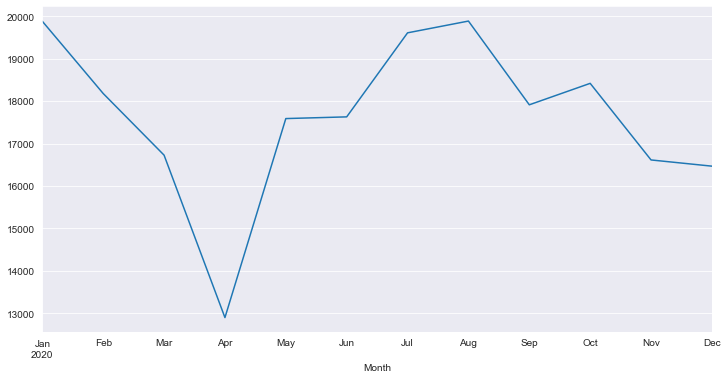

In [8]:
unique_observations_by_month = cdata.groupby('Month')['ID'].nunique()
unique_observations_by_month.plot(
    kind = 'line', 
    #ylim = (0, 20000),
    figsize=(12, 6)
);

### How has the proportion of cases leading to an arrest changed over time?

In [9]:
arrest_prop = cdata.groupby(['Month', 'Arrest'])['ID'].nunique().reset_index()
arrest_prop['Sum'] = arrest_prop.groupby('Month')['ID'].transform('sum')
arrest_prop['Prop'] = arrest_prop['ID'] / arrest_prop['Sum']
arrest_prop.head()

,Month,Arrest,ID,Sum,Prop
0,2020-01-01,False,15355,19877,0.772501
1,2020-01-01,True,4522,19877,0.227499
2,2020-02-01,False,13996,18177,0.769984
3,2020-02-01,True,4181,18177,0.230016
4,2020-03-01,False,13612,16726,0.813823


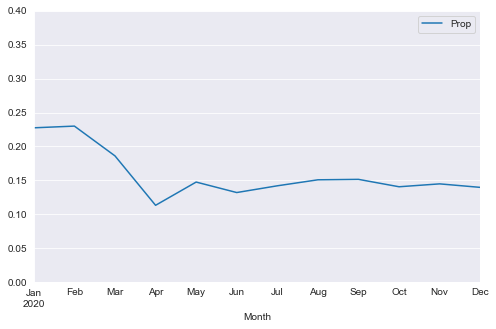

In [10]:
mask = arrest_prop['Arrest'] == True
arrest_prop[mask].plot(
    x='Month',
    y='Prop',
    figsize=(8,5),
    ylim=(0, 0.4),
);

### Aside: Can we combine two graphs?

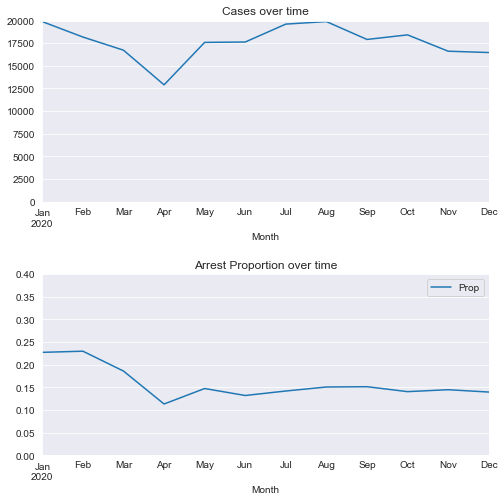

In [11]:
fid, ax = plt.subplots(2, 1, figsize = (8,8))

unique_observations_by_month.plot(
    kind = 'line', 
    ylim = (0, 20000),
    ax= ax[0],
    title = 'Cases over time',
);

mask = arrest_prop['Arrest'] == True
arrest_prop[mask].plot(
    x='Month',
    y='Prop',
    ylim=(0, 0.4),
    ax= ax[1],
    title = 'Arrest Proportion over time',
);

plt.subplots_adjust(hspace=0.4)
plt.show()

### How have `Domestic` crimes evolved over time?

In [12]:
domestic_prop = cdata.groupby(['Month', 'Domestic'])['ID'].nunique().reset_index()
domestic_prop['Sum'] = domestic_prop.groupby('Month')['ID'].transform('sum')
domestic_prop['Prop'] = domestic_prop['ID'] / domestic_prop['Sum']
domestic_prop.head()

,Month,Domestic,ID,Sum,Prop
0,2020-01-01,False,16586,19877,0.834432
1,2020-01-01,True,3291,19877,0.165568
2,2020-02-01,False,15136,18177,0.832701
3,2020-02-01,True,3041,18177,0.167299
4,2020-03-01,False,13381,16726,0.800012


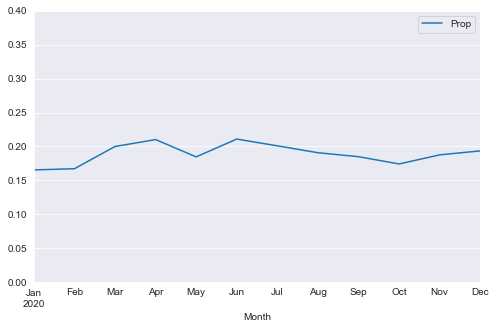

In [13]:
mask = domestic_prop['Domestic'] == True
domestic_prop[mask].plot(
    x='Month',
    y='Prop',
    figsize=(8,5),
    ylim=(0, 0.4),
);

### How has the `Primary Type` of call evolved over time?

In [14]:
cdata['Primary_Type'] = cdata.Primary_Type.str.replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT')

In [15]:
pt_data = cdata.groupby(['Month', 'Primary_Type'])['ID'].nunique().reset_index()
pt_data = pt_data.pivot(
    columns = 'Month',
    index = 'Primary_Type',
    values = 'ID',
)
pt_data = pt_data.fillna(0)
pt_data

Month,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01
Primary_Type,,,,,,,,,,,,
ARSON,23.0,31.0,27.0,36.0,78.0,74.0,63.0,57.0,56.0,54.0,50.0,40.0
ASSAULT,1519.0,1386.0,1477.0,1112.0,1488.0,1724.0,1891.0,1835.0,1698.0,1512.0,1337.0,1275.0
BATTERY,3605.0,3387.0,3561.0,2693.0,3504.0,3922.0,4151.0,4075.0,3442.0,3414.0,3015.0,2729.0
BURGLARY,740.0,619.0,567.0,528.0,1323.0,754.0,738.0,1062.0,612.0,643.0,618.0,549.0
CONCEALED CARRY LICENSE VIOLATION,15.0,13.0,11.0,7.0,12.0,13.0,14.0,11.0,17.0,14.0,13.0,8.0
CRIMINAL DAMAGE,1792.0,1742.0,1892.0,1784.0,2478.0,2451.0,2503.0,2364.0,2168.0,2143.0,1888.0,1669.0
CRIMINAL SEXUAL ASSAULT,150.0,116.0,106.0,62.0,92.0,104.0,116.0,106.0,95.0,105.0,95.0,76.0
CRIMINAL TRESPASS,575.0,535.0,394.0,235.0,277.0,285.0,308.0,342.0,374.0,315.0,271.0,265.0
DECEPTIVE PRACTICE,1573.0,1369.0,1199.0,1104.0,1033.0,1139.0,1363.0,1177.0,1188.0,2047.0,2031.0,2845.0


In [16]:
pt_data = pt_data.divide(pt_data.max(axis=1), axis=0)

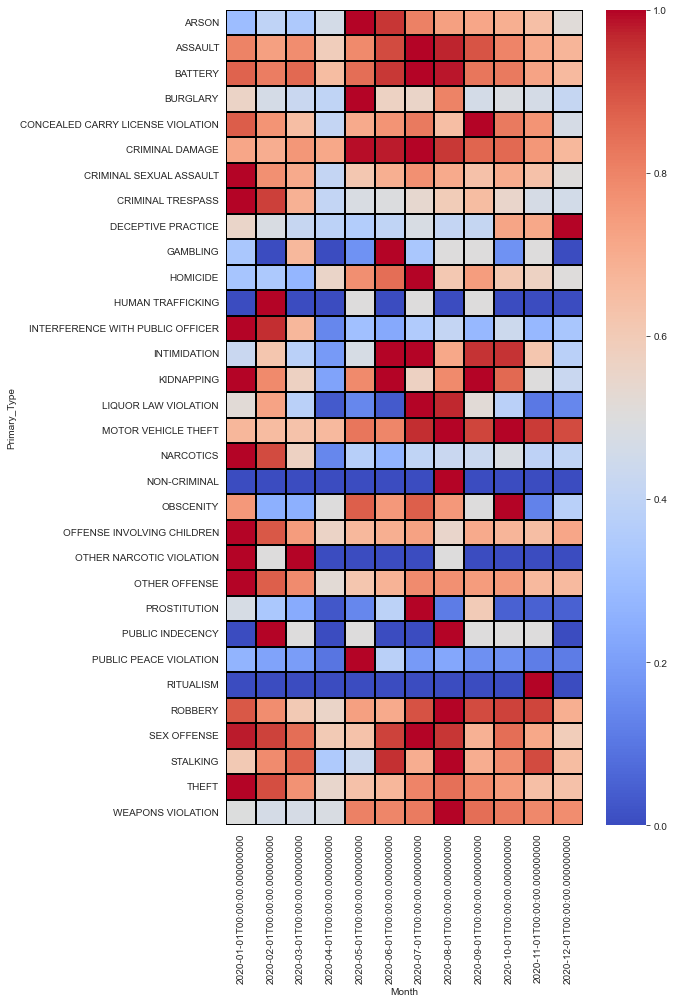

In [17]:
fig, ax = plt.subplots(1, 1, figsize= (8,15))

sns.heatmap(pt_data,
           cmap = 'coolwarm',
           linewidths= .1,
           linecolor= 'k')

plt.show()

### Are there any observable patterns in arrest rates by district?

In [18]:
agg_dict = {
    'Arrest': 'sum',
    'ID': 'nunique',
}

district_arrests = cdata.groupby('District').agg(agg_dict)
district_arrests.columns = ['arrests', 'incidents']
district_arrests['arrest_proportion'] = district_arrests.eval('arrests/incidents')
district_arrests = district_arrests.reset_index()

<AxesSubplot:title={'center':'Arrest Proportion by District'}, xlabel='District'>

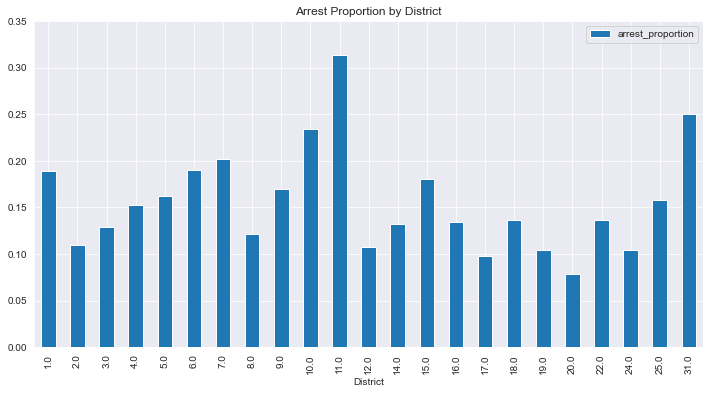

In [19]:
district_arrests.plot(
    kind= 'bar',
    x= 'District',
    y= 'arrest_proportion',
    figsize= (12,6),
    ylim= (0, 0.35),
    title= 'Arrest Proportion by District',
)

In [20]:
arrests_by_district = cdata.groupby(['District', 'Arrest'])['ID'].nunique().reset_index()
arrests_by_district['Sum'] = arrests_by_district.groupby('District')['ID'].transform('sum')
arrests_by_district['Prop'] = arrests_by_district['ID'] / arrests_by_district['Sum']
arrests_by_district.head()

,District,Arrest,ID,Sum,Prop
0,1.0,False,6814,8397,0.811480
1,1.0,True,1583,8397,0.188520
2,2.0,False,8466,9513,0.889940
3,2.0,True,1047,9513,0.110060
4,3.0,False,9594,11009,0.871469


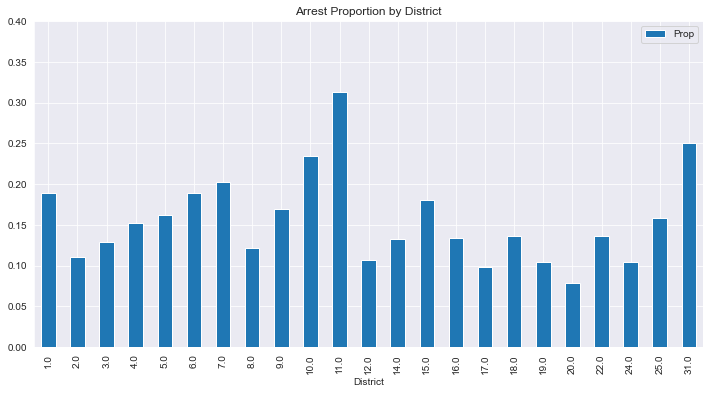

In [21]:
mask = arrests_by_district['Arrest'] == True
arrests_by_district[mask].plot(
    kind= 'bar',
    x= 'District',
    y= 'Prop',
    figsize= (12,6),
    ylim= (0, 0.4),
    title= 'Arrest Proportion by District',
);

### Have any specific types of crime (`IUCR`s) change dramatically over time?

In [22]:
IUCR_by_month = cdata.groupby(['IUCR', 'Month'])['ID'].nunique().reset_index()

In [23]:
IUCR_by_month = IUCR_by_month.pivot(
    index = 'IUCR',
    columns = 'Month',
    values = 'ID'
).fillna(0)

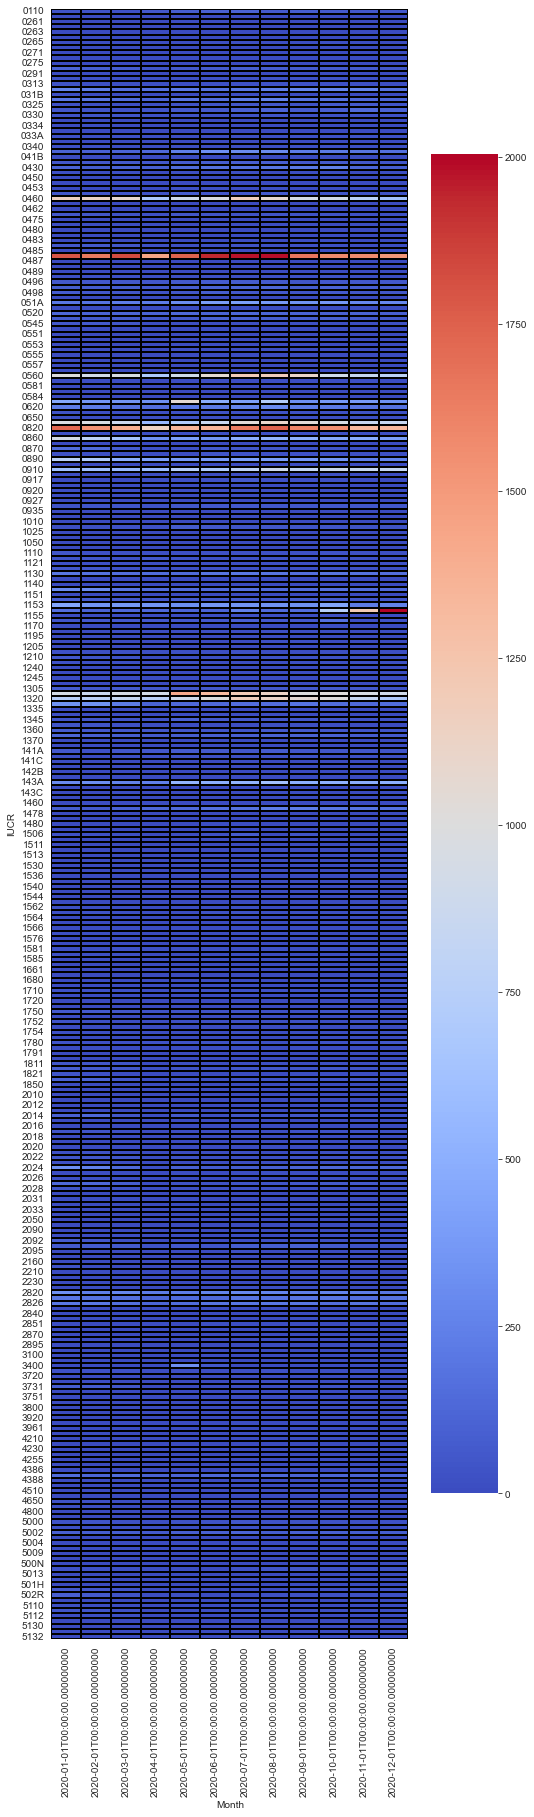

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (8,30))


sns.heatmap(
    IUCR_by_month,
    cmap = 'coolwarm',
    linewidths= .1,
    linecolor= 'k')

plt.show()

In [25]:
import numpy as np

In [26]:
IUCR_by_month.loc['0110']

Month
2020-01-01     36.0
2020-02-01     36.0
2020-03-01     30.0
2020-04-01     62.0
2020-05-01     85.0
2020-06-01     94.0
2020-07-01    109.0
2020-08-01     68.0
2020-09-01     82.0
2020-10-01     66.0
2020-11-01     62.0
2020-12-01     55.0
Name: 0110, dtype: float64

In [27]:
x = [1,2,3,4,5]
y = [1,3,5,7,9]

In [28]:
np.polyfit(x,y,1)

array([ 2., -1.])

In [29]:
month_x_values = [i for i in range(1, 13)]
np.polyfit(month_x_values,
           IUCR_by_month.loc['0110'],
           1)

array([ 2.65384615, 48.16666667])

In [30]:
def get_slope(series):
    return np.polyfit(month_x_values, series, deg=1)[0]

In [31]:
def get_intercept(series):
    return np.polyfit(month_x_values, series, deg=1)[1]

In [32]:
get_intercept(IUCR_by_month.loc['0110'])

48.16666666666663

In [33]:
get_slope(IUCR_by_month.loc['0110'])

2.6538461538461524

In [34]:
slopes = IUCR_by_month.apply(lambda row: get_slope(row), axis=1)
intercepts = IUCR_by_month.apply(lambda row: get_intercept(row), axis=1)

In [35]:
IUCR_by_month['slopes'] = slopes
IUCR_by_month['intercepts'] = intercepts

In [39]:
columns_to_exclude = [
    'slopes',
    'intercepts',
    'pct_change',
]

month_columns = [col for col in IUCR_by_month.columns if col not in columns_to_exclude]

In [40]:
IUCR_by_month['median'] = IUCR_by_month[month_columns].median(axis=1)

In [41]:
IUCR_by_month['pct_change'] = IUCR_by_month['slopes']/IUCR_by_month['median'] 

In [42]:
IUCR_by_month

Month,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,slopes,intercepts,median,pct_change
IUCR,,,,,,,,,,,,,,,,
0110,36.0,36.0,30.0,62.0,85.0,94.0,109.0,68.0,82.0,66.0,62.0,55.0,2.653846,48.166667,64.0,0.041466
0142,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.052448,0.409091,0.5,0.104895
0261,2.0,4.0,4.0,2.0,9.0,8.0,3.0,4.0,4.0,3.0,4.0,4.0,0.017483,4.136364,4.0,0.004371
0262,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010490,0.151515,0.0,-inf
0263,3.0,1.0,3.0,2.0,0.0,0.0,3.0,3.0,7.0,0.0,0.0,1.0,-0.052448,2.257576,1.5,-0.034965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,11.0,20.0,16.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0,-1.377622,13.954545,1.5,-0.918415
5121,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.052448,0.590909,0.0,-inf
5130,1.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,-0.122378,1.712121,0.0,-inf


In [43]:
IUCR_by_month[IUCR_by_month['pct_change'] > -np.inf].nsmallest(10, 'pct_change')

Month,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,slopes,intercepts,median,pct_change
IUCR,,,,,,,,,,,,,,,,
3400,0.0,0.0,3.0,2.0,325.0,61.0,1.0,5.0,0.0,0.0,0.0,0.0,-3.674825,56.969697,0.5,-7.349650
5112,11.0,20.0,16.0,3.0,1.0,3.0,1.0,0.0,1.0,2.0,1.0,1.0,-1.377622,13.954545,1.5,-0.918415
2170,35.0,11.0,4.0,3.0,2.0,1.0,1.0,3.0,4.0,3.0,2.0,2.0,-1.548951,15.984848,3.0,-0.516317
2016,2.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.185315,1.954545,0.5,-0.370629
2026,31.0,19.0,14.0,1.0,2.0,3.0,4.0,4.0,4.0,16.0,8.0,3.0,-1.297203,17.515152,4.0,-0.324301
5110,16.0,12.0,12.0,0.0,3.0,3.0,1.0,4.0,2.0,4.0,3.0,3.0,-0.940559,11.363636,3.0,-0.313520
3100,2.0,0.0,1.0,1.0,13.0,11.0,3.0,2.0,0.0,0.0,0.0,0.0,-0.262238,4.454545,1.0,-0.262238
3760,5.0,2.0,3.0,0.0,1.0,4.0,4.0,0.0,1.0,0.0,1.0,1.0,-0.251748,3.469697,1.0,-0.251748
1821,43.0,31.0,14.0,1.0,2.0,1.0,1.0,7.0,8.0,10.0,8.0,10.0,-1.916084,23.787879,8.0,-0.239510


In [44]:
IUCR_by_month[IUCR_by_month['pct_change'] < np.inf].nlargest(10, 'pct_change')

Month,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,slopes,intercepts,median,pct_change
IUCR,,,,,,,,,,,,,,,,
1154,159.0,106.0,129.0,132.0,116.0,115.0,258.0,145.0,162.0,751.0,1209.0,2004.0,122.223776,-353.954545,152.0,0.804104
0918,0.0,0.0,0.0,0.0,2.0,3.0,5.0,3.0,0.0,1.0,0.0,3.0,0.157343,0.393939,0.5,0.314685
4220,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.129371,-0.257576,0.5,0.258741
0487,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,2.0,0.0,1.0,0.125874,0.015152,0.5,0.251748
1200,2.0,3.0,1.0,1.0,2.0,2.0,1.0,21.0,21.0,2.0,3.0,0.0,0.493007,1.712121,2.0,0.246503
041B,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,3.0,0.0,2.0,0.122378,0.121212,0.5,0.244755
1170,6.0,2.0,0.0,0.0,2.0,4.0,1.0,2.0,0.0,8.0,5.0,6.0,0.279720,1.181818,2.0,0.139860
5003,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,0.066434,0.318182,0.5,0.132867
0142,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,1.0,0.052448,0.409091,0.5,0.104895


### How is crime affected by the hour of the day?

In [45]:
arrest_prop_by_hour = cdata.groupby(['Hour', 'Arrest'])['ID'].nunique().reset_index()
arrest_prop_by_hour['Sum'] = arrest_prop_by_hour.groupby('Hour')['ID'].transform('sum')
arrest_prop_by_hour['Prop'] = arrest_prop_by_hour['ID'] / arrest_prop_by_hour['Sum']
arrest_prop_by_hour.head()

,Hour,Arrest,ID,Sum,Prop
0,0,False,10734,12444,0.862584
1,0,True,1710,12444,0.137416
2,1,False,5566,6793,0.819373
3,1,True,1227,6793,0.180627
4,2,False,4816,5790,0.831779


In [46]:
unique_observations_by_hour = cdata.groupby('Hour')['ID'].nunique().reset_index()
unique_observations_by_hour['Prop'] = unique_observations_by_hour['ID'] / 211791
unique_observations_by_hour.head()

,Hour,ID,Prop
0,0,12444,0.058756
1,1,6793,0.032074
2,2,5790,0.027338
3,3,5109,0.024123
4,4,4031,0.019033


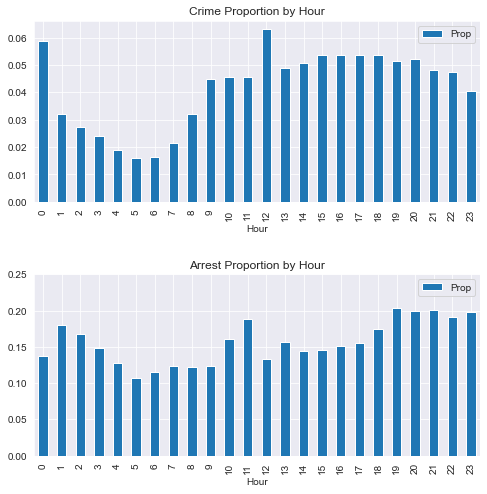

In [47]:
fid, ax = plt.subplots(2, 1, figsize = (8,8))

unique_observations_by_hour.plot(
    kind = 'bar', 
    x='Hour',
    y='Prop',
    #figsize=(12, 6),
    ax= ax[0],
    title = 'Crime Proportion by Hour',
);

mask = arrest_prop_by_hour['Arrest'] == True
arrest_prop_by_hour[mask].plot(
    kind= 'bar',
    x='Hour',
    y='Prop',
    #figsize=(8,5),
    ylim=(0, 0.25),
    ax= ax[1],
    title = 'Arrest Proportion by Hour' ,
);

plt.subplots_adjust(hspace=0.4)
plt.show()

### Extra

In [48]:
data_filepaths = list(pathlib.Path('data').glob('*csv'))
data_filepaths

[WindowsPath('data/2001_data.csv'),
 WindowsPath('data/2002_data.csv'),
 WindowsPath('data/2003_data.csv'),
 WindowsPath('data/2004_data.csv'),
 WindowsPath('data/2005_data.csv'),
 WindowsPath('data/2006_data.csv'),
 WindowsPath('data/2007_data.csv'),
 WindowsPath('data/2008_data.csv'),
 WindowsPath('data/2009_data.csv'),
 WindowsPath('data/2010_data.csv'),
 WindowsPath('data/2011_data.csv'),
 WindowsPath('data/2012_data.csv'),
 WindowsPath('data/2013_data.csv'),
 WindowsPath('data/2014_data.csv'),
 WindowsPath('data/2015_data.csv'),
 WindowsPath('data/2016_data.csv'),
 WindowsPath('data/2017_data.csv'),
 WindowsPath('data/2018_data.csv'),
 WindowsPath('data/2019_data.csv'),
 WindowsPath('data/2020_data.csv'),
 WindowsPath('data/2021_data.csv'),
 WindowsPath('data/2022_data.csv')]

In [49]:
all_data = pd.DataFrame()

for data_filepath in data_filepaths:
    print(f' - starting {data_filepath}')
    temp = pd.read_csv(data_filepath)
    temp = temp.head()

    all_data = pd.concat([all_data, temp])

 - starting data\2001_data.csv
 - starting data\2002_data.csv
 - starting data\2003_data.csv
 - starting data\2004_data.csv
 - starting data\2005_data.csv
 - starting data\2006_data.csv
 - starting data\2007_data.csv
 - starting data\2008_data.csv
 - starting data\2009_data.csv
 - starting data\2010_data.csv
 - starting data\2011_data.csv
 - starting data\2012_data.csv
 - starting data\2013_data.csv
 - starting data\2014_data.csv
 - starting data\2015_data.csv
 - starting data\2016_data.csv
 - starting data\2017_data.csv
 - starting data\2018_data.csv
 - starting data\2019_data.csv
 - starting data\2020_data.csv
 - starting data\2021_data.csv
 - starting data\2022_data.csv


In [50]:
pd.date_range(
    start='1/1/2022',
    end='1/31/2022',
    freq='D',
)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')